In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn
import mylibrary.datasets as datasets

In [2]:
mnist = datasets.MNIST()
train_data, train_label_, test_data, test_label_ = mnist.load()

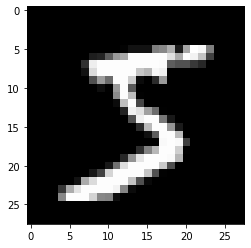

In [5]:
plt.imshow(train_data[0].reshape(28,28), cmap='gray')

In [6]:
train_data = train_data / 255.
test_data = test_data / 255.

input_size = 784
hidden_1 = 10
output_size = 10

batch_size = 64#300

train_label = tnn.Logits.index_to_logit(train_label_)
train_size = len(train_label)

## Without BatchNorm

In [30]:
optim = tnn.Adam(0.001)
net = tnn.AutoForm(new_layers=True)
linear1 = tnn.WeightsLayer(784, 250, optimizer=optim)
# bn1 = tnn.BatchNormalization(250, optimizer=optim)
bias1 = tnn.BiasLayer(250, optimizer=optim)
relu1 = tnn.Relu()
linear2 = tnn.WeightsLayer(250, 100, optimizer=optim)
# bn2 = tnn.BatchNormalization(100, optimizer=optim)
bias2 = tnn.BiasLayer(100, optimizer=optim)
relu2 = tnn.Relu()
linear3 = tnn.LinearLayer(100, 10, optimizer=optim)

In [31]:
accuracy_list = []
loss_list = []
for epoch in range(5):
    for index in range(train_size // batch_size):
        train_x = train_data[index * batch_size:(index + 1) * batch_size]
        train_y = train_label[index * batch_size:(index + 1) * batch_size]

        yout = net.forward(train_x)

        dy = tnn.SoftmaxCrossEntropy.del_loss(yout, train_y)
        loss = tnn.SoftmaxCrossEntropy.loss(yout, train_y)
        loss_list.append(loss)

        dx = net.backward(dy)
        net.update()
        
        if index % 100 == 0:
            
            print('\nTRAIN',index, '-> ', loss)
            yout = net.forward(train_data)
            outputs = tnn.Logits.logit_to_index(yout)
            correct = (outputs == np.array(train_label_)).astype(int).sum()
            accuracy = correct / len(train_label_) * 100.
            print('EPOCH = ',epoch,'accuracy = ', accuracy)
            print(correct, '/', len(train_label_))
            
            yout = net.forward(test_data)
            outputs = tnn.Logits.logit_to_index(yout)
            correct = (outputs == np.array(test_label_)).astype(int).sum()
            accuracy = correct / len(test_label_) * 100.
            accuracy_list.append(accuracy)
            print('   TEST  ','accuracy = ', accuracy)
            print(correct, '/', len(test_label_))            


TRAIN 0 ->  6.5023150641770595
EPOCH =  0 accuracy =  16.265
9759 / 60000
   TEST   accuracy =  16.38
1638 / 10000

TRAIN 100 ->  5.757386964283628
EPOCH =  0 accuracy =  89.46666666666667
53680 / 60000
   TEST   accuracy =  89.72
8972 / 10000

TRAIN 200 ->  5.758625604744358
EPOCH =  0 accuracy =  92.38666666666666
55432 / 60000
   TEST   accuracy =  92.4
9240 / 10000

TRAIN 300 ->  5.702176671788985
EPOCH =  0 accuracy =  94.935
56961 / 60000
   TEST   accuracy =  94.86
9486 / 10000

TRAIN 400 ->  5.690284175203955
EPOCH =  0 accuracy =  95.46
57276 / 60000
   TEST   accuracy =  95.05
9505 / 10000

TRAIN 500 ->  5.725327184764171
EPOCH =  0 accuracy =  95.90166666666666
57541 / 60000
   TEST   accuracy =  95.58
9558 / 10000

TRAIN 600 ->  5.686185860956017
EPOCH =  0 accuracy =  95.43166666666667
57259 / 60000
   TEST   accuracy =  95.11
9511 / 10000

TRAIN 700 ->  5.73984489166563
EPOCH =  0 accuracy =  96.50166666666667
57901 / 60000
   TEST   accuracy =  96.06
9606 / 10000

TRAIN

## With BatchNorm

In [8]:
optim = tnn.Adam(0.005)
net = tnn.AutoForm(new_layers=True)
linear1 = tnn.WeightsLayer(784, 250, optimizer=optim)
bn1 = tnn.BatchNormalization(250, optimizer=optim)
# bias1 = tnn.BiasLayer(250, optimizer=optim)
relu1 = tnn.Relu()
linear2 = tnn.WeightsLayer(250, 100, optimizer=optim)
bn2 = tnn.BatchNormalization(100, optimizer=optim)
# bias2 = tnn.BiasLayer(100, optimizer=optim)
relu2 = tnn.Relu()
linear3 = tnn.LinearLayer(100, 10, optimizer=optim)

In [9]:
accuracy_list = []
loss_list = []

for epoch in range(5):
    for index in range(train_size // batch_size):
        train_x = train_data[index * batch_size:(index + 1) * batch_size]
        train_y = train_label[index * batch_size:(index + 1) * batch_size]

        yout = net.forward(train_x)

        dy = tnn.SoftmaxCrossEntropy.del_loss(yout, train_y)
        loss = tnn.SoftmaxCrossEntropy.loss(yout, train_y)
        loss_list.append(loss)

        dx = net.backward(dy)
        net.update()
        
        if index % 100 == 0:
            
            bn1.training = False
            bn2.training = False
            
            print('\nTRAIN',index, '-> ', loss)
            yout = net.forward(train_data)
            outputs = tnn.Logits.logit_to_index(yout)
            correct = (outputs == np.array(train_label_)).astype(int).sum()
            accuracy = correct / len(train_label_) * 100.
            print('EPOCH = ',epoch,'accuracy = ', accuracy)
            print(correct, '/', len(train_label_))
            
            yout = net.forward(test_data)
            outputs = tnn.Logits.logit_to_index(yout)
            correct = (outputs == np.array(test_label_)).astype(int).sum()
            accuracy = correct / len(test_label_) * 100.
            accuracy_list.append(accuracy)
            print('   TEST  ','accuracy = ', accuracy)
            print(correct, '/', len(test_label_))
            
            
            bn1.training = True
            bn2.training = True


TRAIN 0 ->  6.493155982537698
EPOCH =  0 accuracy =  34.34166666666666
20605 / 60000
   TEST   accuracy =  33.26
3326 / 10000

TRAIN 100 ->  5.749403985985627
EPOCH =  0 accuracy =  85.01666666666667
51010 / 60000
   TEST   accuracy =  85.9
8590 / 10000

TRAIN 200 ->  5.737065137422751
EPOCH =  0 accuracy =  93.315
55989 / 60000
   TEST   accuracy =  92.92
9292 / 10000

TRAIN 300 ->  5.718863020534515
EPOCH =  0 accuracy =  95.54833333333333
57329 / 60000
   TEST   accuracy =  95.19
9519 / 10000

TRAIN 400 ->  5.690198839859225
EPOCH =  0 accuracy =  94.80833333333332
56885 / 60000
   TEST   accuracy =  94.6
9460 / 10000

TRAIN 500 ->  5.748414489209194
EPOCH =  0 accuracy =  96.22333333333334
57734 / 60000
   TEST   accuracy =  96.03
9603 / 10000

TRAIN 600 ->  5.672910785149014
EPOCH =  0 accuracy =  96.66666666666667
58000 / 60000
   TEST   accuracy =  96.27
9627 / 10000

TRAIN 700 ->  5.73369754786368
EPOCH =  0 accuracy =  96.94333333333334
58166 / 60000
   TEST   accuracy =  96.

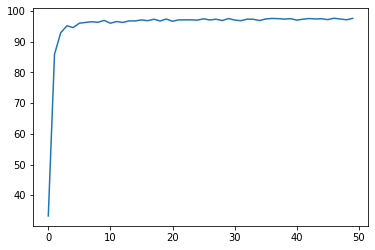

In [10]:
plt.plot(accuracy_list)

In [11]:
np.linalg.norm(linear1.weights, ord=2, axis=0)

array([3.22665388, 4.7932811 , 3.89808014, 5.06748982, 4.18821738,
       4.74964861, 4.16698334, 4.94509039, 3.5953083 , 3.95572047,
       4.59437361, 4.1242208 , 3.8723101 , 3.35848642, 2.99134678,
       4.02380929, 3.98013907, 4.04643423, 4.32991779, 4.74337761,
       5.58543622, 4.5448307 , 4.19742279, 4.50087767, 2.97669342,
       4.37688411, 4.0035629 , 4.87348946, 3.41846845, 4.06794735,
       4.28061178, 5.23213608, 3.89814096, 4.89233721, 4.57013414,
       5.53508977, 3.95835764, 4.23319661, 4.15784366, 3.63046506,
       3.65894877, 4.72895913, 4.40466433, 4.05468358, 4.77441923,
       3.65206007, 4.17849744, 5.30565381, 3.4097498 , 4.14232482,
       4.74744775, 4.27596506, 3.51506471, 4.75409082, 4.16046689,
       5.09869542, 4.48428172, 4.86873335, 3.37756127, 4.27031929,
       4.45141479, 3.38742515, 3.63828376, 3.71167355, 4.58675568,
       3.98441102, 3.53993935, 4.44888036, 4.01641745, 3.31856555,
       4.6032413 , 4.40569762, 5.80062831, 4.83959462, 3.38000